In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Data preproccessing

In [11]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('data/heart_attack_dataset.csv')
label_encoder={}
for column in  ['Gender', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment']:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,1,70,181,262,0,2,3,2
1,0,55,103,253,1,2,1,0
2,1,42,95,295,1,0,3,0
3,1,84,106,270,0,2,1,1
4,1,86,187,296,1,0,2,3


In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Data split and featuring

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Build and Train the Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

### Prediction

In [18]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.2866666666666667

In [21]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[17, 13, 30,  9],
       [19, 27, 17, 12],
       [17, 27, 23, 11],
       [16, 21, 22, 19]], dtype=int64)

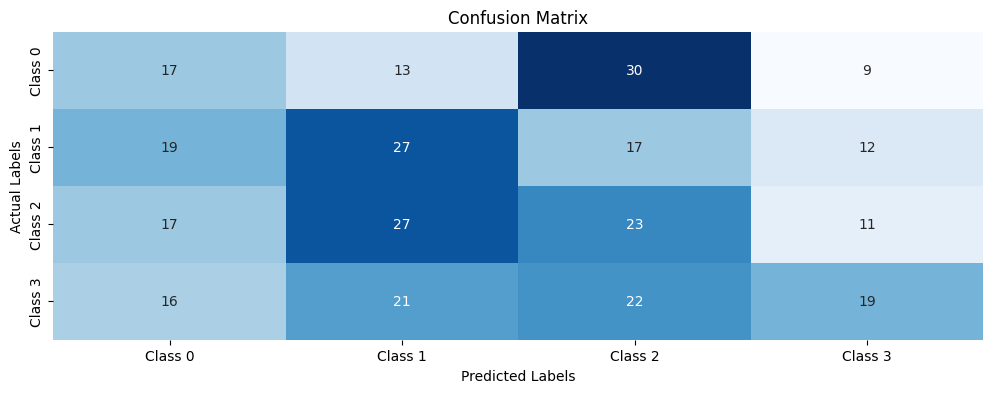

In [25]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])  
ax.yaxis.set_ticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

plt.show()

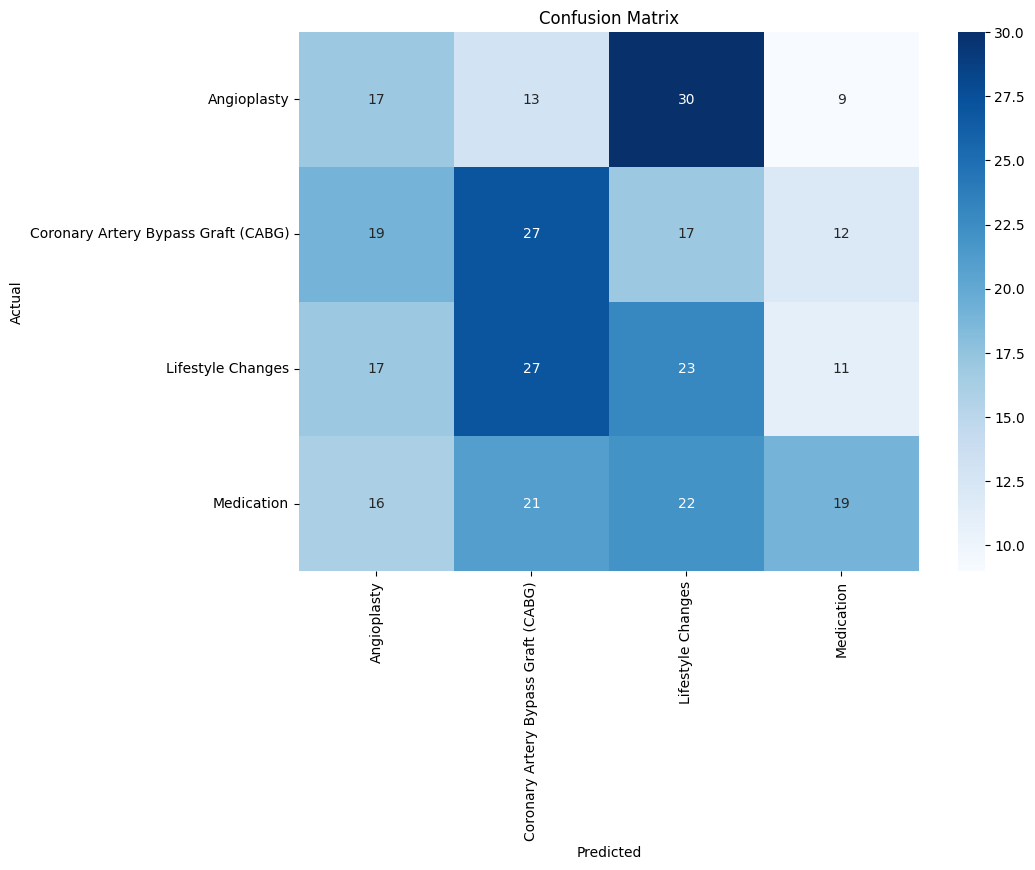

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder['Treatment'].classes_, yticklabels=label_encoder['Treatment'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()